<a href="https://colab.research.google.com/github/Abirmai369/-Super-Store-Sales-Financial-Analysis-Dashboard/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Country             City  AQI Value AQI Category  CO AQI Value  \
0               China          Qinzhou       68.0     Moderate           2.0   
1               Italy  Priolo Gargallo       66.0     Moderate           1.0   
2             Belgium            Puurs       64.0     Moderate           1.0   
3              France          Raismes       59.0     Moderate           1.0   
4  Russian Federation       Pyatigorsk       54.0     Moderate           1.0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good             68.0           Moderate            1.0   
1            Good             39.0               Good            2.0   
2            Good             29.0               Good            7.0   
3            Good             30.0               Good            4.0   
4            Good             41.0               Good            1.0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat       lng  \
0        

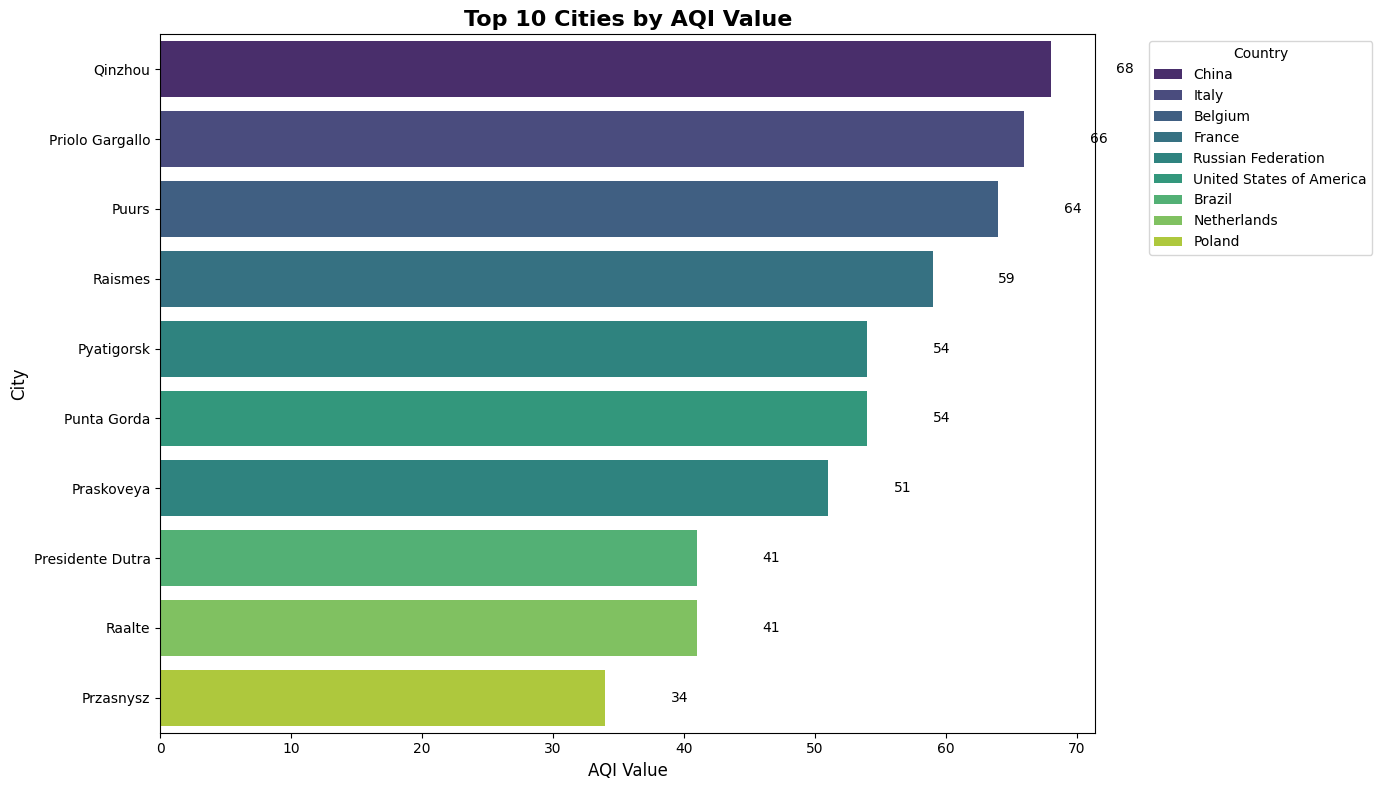

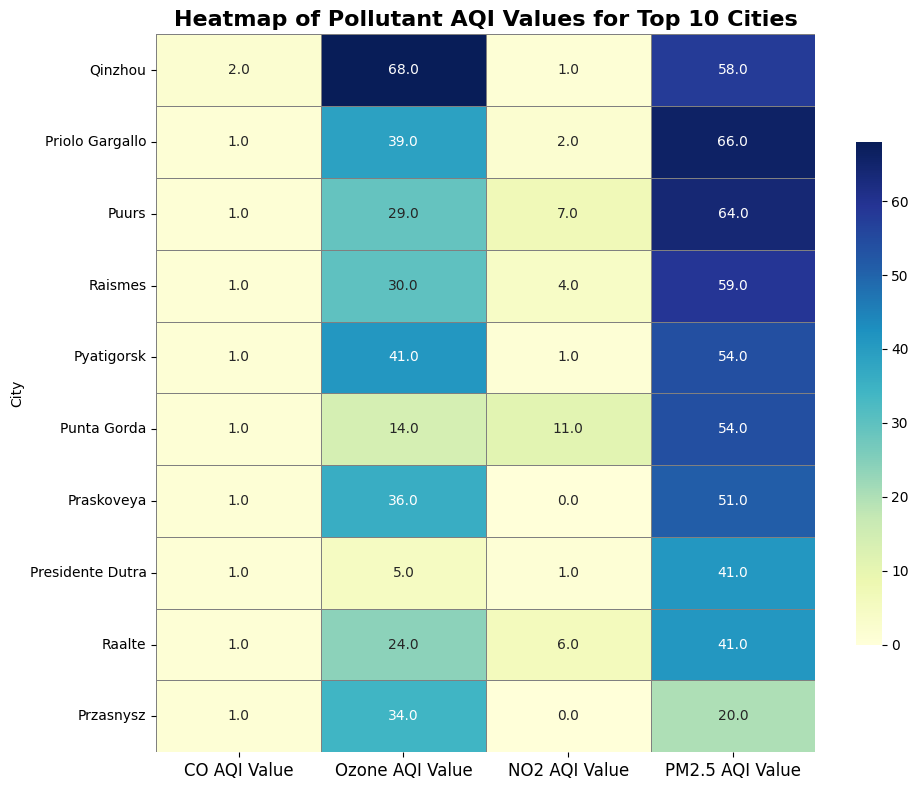

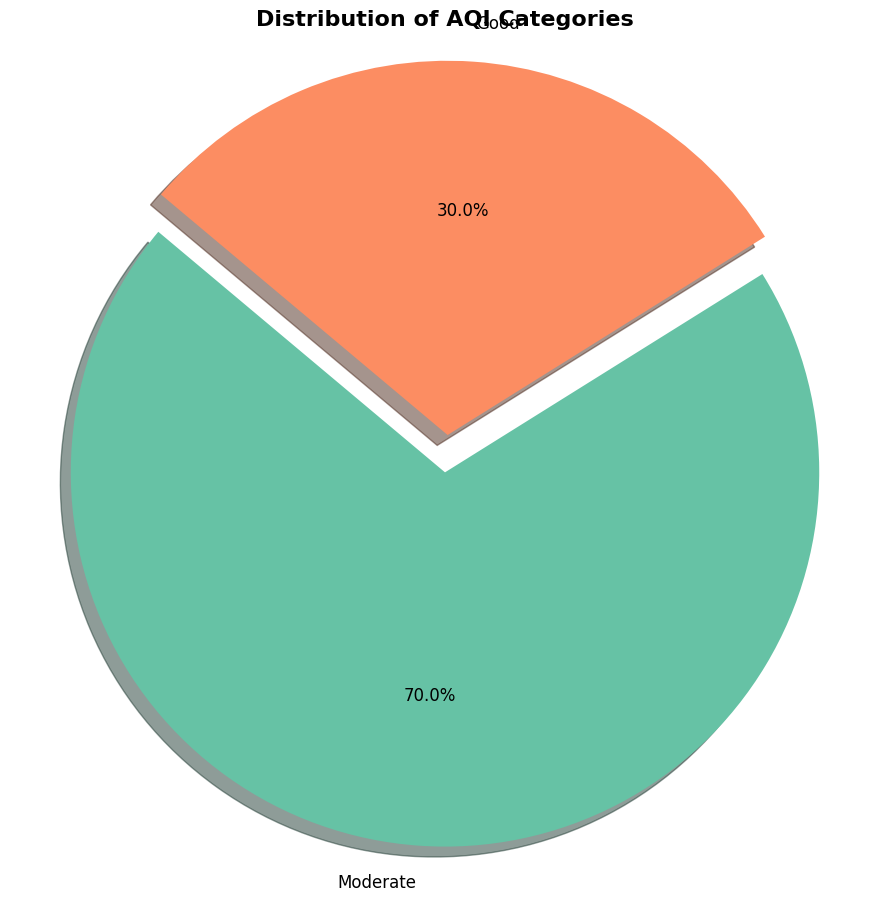

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("AQI and Lat Long of Countries.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert numeric columns to float where applicable
numeric_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove duplicates based on City (keep highest AQI)
df = df.sort_values(by='AQI Value', ascending=False).drop_duplicates('City').reset_index(drop=True)

# Show first few rows
print(df.head())

# 1. Bar Chart: Top N Cities by AQI Value
def plot_bar_chart(df, top_n=10):
    top_cities = df.sort_values(by='AQI Value', ascending=False).head(top_n)

    plt.figure(figsize=(14, 8))
    barplot = sns.barplot(
        x='AQI Value',
        y='City',
        hue='Country',
        data=top_cities,
        dodge=False,
        palette="viridis"
    )
    plt.title(f"Top {top_n} Cities by AQI Value", fontsize=16, fontweight='bold')
    plt.xlabel("AQI Value", fontsize=12)
    plt.ylabel("City", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Add value labels on bars
    for index, value in enumerate(top_cities['AQI Value']):
        plt.text(value + 5, index, f"{int(value)}", va='center', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# 2. Heatmap: Pollutant AQI Levels per City
def plot_heatmap(df, top_n=10):
    pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

    # Select relevant data and sort by AQI Value
    heatmap_data = df[['City', 'AQI Value'] + pollutants].copy()
    heatmap_data.sort_values(by='AQI Value', ascending=False, inplace=True)
    heatmap_data.set_index('City', inplace=True)
    heatmap_data = heatmap_data.head(top_n)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        heatmap_data[pollutants],
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        linewidths=.5,
        linecolor='gray',
        cbar_kws={'shrink': .7}
    )
    plt.title(f"Heatmap of Pollutant AQI Values for Top {top_n} Cities", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# 3. Pie Chart: Distribution of AQI Categories
def plot_pie_chart(df):
    category_counts = df['AQI Category'].value_counts()

    plt.figure(figsize=(9, 9))
    colors = sns.color_palette("Set2")
    explode = [0.05 if val > max(category_counts) * 0.1 else 0 for val in category_counts]

    plt.pie(
        category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12}
    )
    plt.title("Distribution of AQI Categories", fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.tight_layout()
    plt.show()

# Run all visualizations
plot_bar_chart(df, top_n=10)
plot_heatmap(df, top_n=10)
plot_pie_chart(df)